# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [2]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [3]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [15]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[["city","country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [16]:
# Q2: how to get the first 5 rows of the "city" column?
df["city"].head(5)

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

### Using .loc[ ]

In [20]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [29]:
# Q4: how to use .loc to select the first row in "country" column?
df["country"].loc[0]

'05/14/2014 11:24'

In [24]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city', 'date']].loc[:3]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [32]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[2, 1]

'05/14/2014 11:24'

In [31]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [58]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [33]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df["city"] == "Munich"

0       False
1       False
2       False
3       False
4       False
        ...  
1754     True
1755     True
1756     True
1757     True
1758     True
Name: city, Length: 1759, dtype: bool

In [34]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 
df[df["city"] != "Barcelona"]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
...,...,...,...,...,...
1754,48.356013,11.791710,07/09/2014 13:13,Munich,Germany
1755,48.356529,11.792183,07/09/2014 13:14,Munich,Germany
1756,48.356285,11.791710,07/09/2014 13:17,Munich,Germany
1757,48.355328,11.791710,07/09/2014 13:18,Munich,Germany


In [35]:
# Q11: select rows where either the city is munich, or the country is serbia
df[(df["city"] != "Munich") & (df["city"] != "Serbia")]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
...,...,...,...,...,...
1748,41.043510,28.985382,07/09/2014 00:33,Istanbul,Turkey
1749,41.043497,28.985433,07/09/2014 06:03,Istanbul,Turkey
1750,41.043513,28.985409,07/09/2014 06:18,Istanbul,Turkey
1751,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey


In [55]:
# Q12: how many observations are west of the prime meridian?
df[df["lon"] < 0]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom
...,...,...,...,...,...
258,41.161528,-8.630898,05/18/2014 18:40,Porto,Portugal
259,41.237025,-8.665684,05/18/2014 18:55,Maia Municipality,Portugal
260,41.236446,-8.671165,05/18/2014 19:25,Matosinhos,Portugal
261,41.237205,-8.672173,05/18/2014 19:55,Maia,Portugal


In [63]:
# Q13: get all rows that contain a city that starts with the letter G
mask = [True if i[0] == 'G' else False for i in df.city]
df[mask]

,lat,lon,date,city,country
659,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
660,50.273632,18.729429,06/02/2014 06:55,Gliwice,Poland
942,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
943,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
1575,40.187827,20.079304,07/04/2014 17:39,Gjirokastër,Albania
1576,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [71]:
# Q14: how many unique cities and countries in the dataset? 
df[["city", "country"]].nunique()
# Also can you check missing values for the dataframe
# df.isna().any()

city       113
country     15
dtype: int64

In [98]:
# Q15: group by country name and show the city names in each of the country
# df.groupby(["country","city"])[["lat", "lon", "date"]]
# df.groupby("country")["city"].agg(pd.Series.mode)
df.groupby(["country","city"]).agg(pd.Series.mode)

lat  \
country                city                                                                            
Albania                Berat                                                               40.702194   
                       Gjirokastër                                          [40.1878246, 40.1878266]   
Bosnia and Herzegovina Herzegovina-Neretva Canton                             [42.91172, 42.9118892]   
                       Mostar                      [43.337605, 43.3456864, 43.3457264, 43.3457469...   
                       Sarajevo                    [43.8585619, 43.8594591, 43.8594718, 43.859502...   
...                                                                                              ...   
Spain                  Hospitalet de Llobregat      [41.3545991, 41.3584596, 41.3595803, 41.3597016]   
                       Viladecans                    [41.289946, 41.2927229, 41.2941432, 41.2947605]   
Turkey                 Istanbul                                                            41.043491   
United Kingdom         Hounslow                                                            51.478199   
                       West Drayton                                                        51.481292   

                                                                                                 lon  \
country                city                                                                            
Albania                Berat                                                               19.946429   
                       Gjirokastër                                          [20.0793033, 20.0793039]   
Bosnia and Herzegovina Herzegovina-Neretva Canton                            [17.6277803, 17.627881]   
                       Mostar                      [17.8114599, 17.8114726, 17.8114795, 17.811480...   
                       Sarajevo                    [18.3974783, 18.4258652, 18.4258718, 18.425885...   
...                                                                                              ...   
Spain                  Hospitalet de Llobregat           [2.1222349, 2.128153, 2.1287013, 2.1301246]   
                       Viladecans                       [2.0597215, 2.0645899, 2.0731769, 2.0755827]   
Turkey                 Istanbul                    [28.8157561, 28.8170347, 28.8187957, 28.820527...   
United Kingdom         Hounslow                                                            -0.446081   
                       West Drayton                                                        -0.451011   

                                                                                                date  
country                city                                                                           
Albania                Berat                       [07/03/2014 14:41, 07/03/2014 14:56, 07/03/201...  
                       Gjirokastër                              [07/04/2014 17:39, 07/04/2014 17:42]  
Bosnia and Herzegovina Herzegovina-Neretva Canton               [06/26/2014 16:57, 06/26/2014 17:12]  
                       Mostar                      [06/23/2014 17:57, 06/23/2014 19:12, 06/23/201...  
                       Sarajevo                    [06/22/2014 14:27, 06/22/2014 15:12, 06/22/201...  
...                                                                                              ...  
Spain                  Hospitalet de Llobregat     [06/12/2014 18:04, 06/13/2014 11:05, 06/13/201...  
                       Viladecans                  [05/18/2014 22:49, 05/18/2014 23:04, 05/18/201...  
Turkey                 Istanbul                    [07/06/2014 20:42, 07/06/2014 20:57, 07/06/201...  
United Kingdom         Hounslow                    [05/14/2014 09:22, 05/14/2014 10:51, 05/14/201...  
                       West Drayton                                                 05/14/2014 09:07  

[113 rows x 3 columns]

## Part 3 <br /> How to select based on a date-time values

In [100]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [112]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt.index.is_unique

False

In [113]:
# Q17: drop duplicate index 
dt.index.drop_duplicates()

DatetimeIndex(['2014-05-14 09:07:00', '2014-05-14 09:22:00',
               '2014-05-14 10:51:00', '2014-05-14 11:24:00',
               '2014-05-14 11:38:00', '2014-05-14 12:23:00',
               '2014-05-14 12:38:00', '2014-05-14 15:11:00',
               '2014-05-14 15:25:00', '2014-05-14 15:41:00',
               ...
               '2014-07-09 06:03:00', '2014-07-09 06:18:00',
               '2014-07-09 09:03:00', '2014-07-09 09:18:00',
               '2014-07-09 13:11:00', '2014-07-09 13:13:00',
               '2014-07-09 13:14:00', '2014-07-09 13:17:00',
               '2014-07-09 13:18:00', '2014-07-09 13:20:00'],
              dtype='datetime64[ns]', name='date', length=1758, freq=None)

In [120]:
# Q18: create a weekday and a weekend dataframe
weekday_dt = dt[dt.index.weekday < 5] # weekday is less than 5
weekday_dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [121]:
weekend_dt = dt[dt.index.weekday >= 5] # weekday is greater than or equal to 5
weekend_dt.head()

,lat,lon,city,country
date,,,,
2014-05-17 00:09:00,38.711824,-9.137308,Lisbon,Portugal
2014-05-17 00:39:00,38.711833,-9.137317,Lisbon,Portugal
2014-05-17 01:09:00,38.711822,-9.137277,Lisbon,Portugal
2014-05-17 01:39:00,38.711823,-9.137273,Lisbon,Portugal
2014-05-17 01:54:00,38.711828,-9.137279,Lisbon,Portugal


Text(0, 0.5, 'Number of observations')

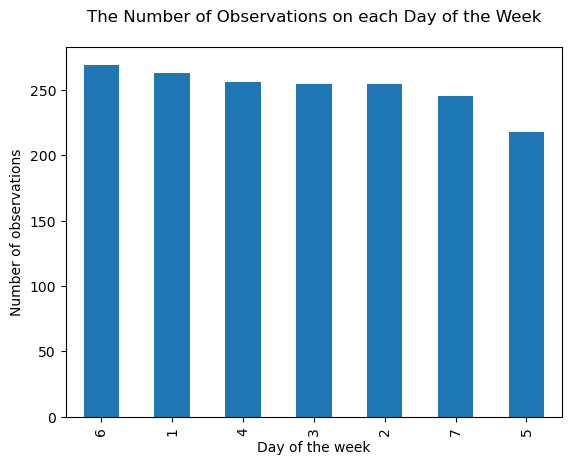

In [160]:
# Q19: calculate and plot the number of observations each day of the week has
# len(dt.index.weekday)
# noo = []
# for i in range(0, 7):
#     noo.append(len(dt[dt.index.weekday == i]))
# noo
dt["day"] = dt.index.weekday + 1
ax = dt["day"].value_counts().plot(kind="bar", title='The Number of Observations on each Day of the Week\n')
ax.set_xlabel("Day of the week")
ax.set_ylabel("Number of observations")